#  (Prosper Loan Data Exploration)
## by (Chiedozie Desmond OBIDI)

## Introduction
> The Prosper loan dataset consists of 113937 loan entries with 81 feature3s for each loan spanning the years 2009 to 2014, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The dataset can be found [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000).




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load in the data into a pandas dataframe
pr = pd.read_csv('prosperLoanData.csv')

## Dataset Overview

Inspect the dataset and do some necessary cleaning before diving into the exploration 

In [3]:
# check up the data shape and data type with info
print(pr.shape)
print(pr.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
pr.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
pr.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


There are 113937 entries and 81 columns in the dataset. I will only select the columns that are of my interest for exploration 

In [6]:
loans = pr.loc[:,['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']]

In [7]:
loans.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20


#### check the data type of each column and change where necessary

In [8]:
loans.dtypes

ListingCreationDate           object
Term                           int64
LoanStatus                    object
ClosedDate                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
AmountDelinquent             float64
IncomeRange                   object
StatedMonthlyIncome          float64
LoanCurrentDaysDelinquent      int64
LoanOriginalAmount             int64
LoanOriginationDate           object
MonthlyLoanPayment           float64
LP_ServiceFees               float64
Investors                      int64
dtype: object

### Observations

1. convert the ListingCreationDate,ClosedDate and LoanOriginationDate columns to date time columns
2. The ProsperRating (Alpha) and ProsperScore columns should be changed to ordinal data type

###### Change the ListingCreationDate,ClosedDate and LoanOriginationDate data type to date time using mapping function. Please check [StackOverflow](https://stackoverflow.com/questions/41514173/change-multiple-columns-in-pandas-dataframe-to-datetime) for more information

In [9]:
# Change the Listing Creation Date,Closed Date and Loan Origination Date data type to date time using mapping function.
cols_2_extract = loans.columns[[0,3,18]]

loans[cols_2_extract] = loans[cols_2_extract].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d %H:%M:%S.%f'))

In [10]:
print(loans.IncomeRange.head())
print(loans.IncomeRange.head())

0    $25,000-49,999
1    $50,000-74,999
2     Not displayed
3    $25,000-49,999
4         $100,000+
Name: IncomeRange, dtype: object
0    $25,000-49,999
1    $50,000-74,999
2     Not displayed
3    $25,000-49,999
4         $100,000+
Name: IncomeRange, dtype: object


In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  object        
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   object        
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  int64         
 10  BorrowerState              108422 non-null  object        
 11  Occupation                 110349 non-null  object  

##### Change the 'EmploymentStatus','LoanStatus','ListingCategory (numeric)','BorrowerState','Occupation' columns to categorical column data type

In [12]:
# Change the 'Employment Status','Loan Status','Listing Category (numeric)','Borrower State','Occupation' columns to categorical column data type
loans[['ProsperScore','EmploymentStatus','LoanStatus','ListingCategory (numeric)','BorrowerState','Occupation']] = loans[['ProsperScore','EmploymentStatus','LoanStatus','ListingCategory (numeric)','BorrowerState','Occupation']].astype("category")

In [13]:
loans.tail()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
113932,2013-04-14 05:55:02.663,36,Current,NaT,0.22354,0.1864,0.1764,C,5.0,1,...,Employed,0.0,"$50,000-74,999",4333.333333,0,10000,2013-04-22,364.74,-75.58,1
113933,2011-11-03 20:42:55.333,36,FinalPaymentInProgress,NaT,0.13220,0.1110,0.1010,A,8.0,7,...,Employed,5062.0,"$75,000-99,999",8041.666667,0,2000,2011-11-07,65.57,-30.05,22
113934,2013-12-13 05:49:12.703,60,Current,NaT,0.23984,0.2150,0.2050,D,3.0,1,...,Employed,0.0,"$25,000-49,999",2875.000000,0,10000,2013-12-23,273.35,-16.91,119
113935,2011-11-14 13:18:26.597,60,Completed,2013-08-13,0.28408,0.2605,0.2505,C,5.0,2,...,Full-time,0.0,"$25,000-49,999",3875.000000,0,15000,2011-11-21,449.55,-235.05,274
113936,2014-01-15 09:27:37.657,36,Current,NaT,0.13189,0.1039,0.0939,A,7.0,1,...,Employed,257.0,"$50,000-74,999",4583.333333,0,2000,2014-01-21,64.90,-1.70,1


##### Convert ProsperRating and IncomeRange into ordered Categorical type

In [14]:
# Convert Prospe rRating and Income Range into ordered Categorical type
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  category      
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   category      
 8   ProsperScore               84853 non-null   category      
 9   ListingCategory (numeric)  113937 non-null  category      
 10  BorrowerState              108422 non-null  category      
 11  Occupation                 110349 non-null  category

In [16]:
loans[['BorrowerState','Occupation']].value_counts().sample(15)

BorrowerState  Occupation           
AL             Clergy                     5
AK             Medical Technician         4
MO             Military Officer           6
ND             Computer Programmer        1
PA             Skilled Labor             96
RI             Pharmacist                 6
WY             Principal                  2
MS             Construction              10
NM             Pharmacist                 2
CA             Sales - Retail           391
NE             Military Enlisted          8
UT             Engineer - Electrical      8
NC             Teacher's Aide            13
AZ             Doctor                     8
OK             Sales - Retail            25
dtype: int64

#### Check for missing values

In [17]:
loans.isnull().values.any()

True

In [18]:
loans.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
AmountDelinquent              7622
IncomeRange                   8547
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
LP_ServiceFees                   0
Investors                        0
dtype: int64

We have about 29084 entries with missing values and if i should remove them, it will affect my data exploration.

In [19]:
# check for any duplicated values

loans.duplicated().values.any()

False

In [20]:
# check the shape and the numeric statistic of the data

print(loans.shape)
print(loans.describe())

(113937, 22)
                Term    BorrowerAPR   BorrowerRate    LenderYield  \
count  113937.000000  113912.000000  113937.000000  113937.000000   
mean       40.830248       0.218828       0.192764       0.182701   
std        10.436212       0.080364       0.074818       0.074516   
min        12.000000       0.006530       0.000000      -0.010000   
25%        36.000000       0.156290       0.134000       0.124200   
50%        36.000000       0.209760       0.184000       0.173000   
75%        36.000000       0.283810       0.250000       0.240000   
max        60.000000       0.512290       0.497500       0.492500   

       AmountDelinquent  StatedMonthlyIncome  LoanCurrentDaysDelinquent  \
count     106315.000000         1.139370e+05              113937.000000   
mean         984.507059         5.608026e+03                 152.816539   
std         7158.270157         7.478497e+03                 466.320254   
min            0.000000         0.000000e+00                   0.

### What is the structure of your dataset?

> The dataset has 113937 loans and 22 fetures having categorical, numeric, datetime and object data type

### What is/are the main feature(s) of interest in your dataset?

>  My main features of interest are occupation, borrower APR, prosper score,  initial loan amount,borrower rate, credit score, monthly payment,  state. I will also deal with other factors if neccessary.

> There are a few crucial aspects to consider, such as:


> LenderYield: The loan's lender yield. The interest rate on the loan less the servicing cost is the lender yield.

> BorrowerAPR: The annual percentage rate (APR) that the borrower will pay on the loan.

> LoanOriginationDate: The loan's origination date.

> ProsperScore: A unique risk score created utilizing Prosper's prior data. The score is between 1 and 10, with 10 representing the best or *lowest risk level. For loans that were started after July 2009.





### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The Loan Status,the Monthly Income, the Term (the length of the loan) and Employment Status, in my opinion, will significantly affect loans and the characteristics we are attempting to explore.

## Univariate Exploration

I will start by examining the primary features of interest which are Proper Score, income range, Borrower's APR and also look at other features

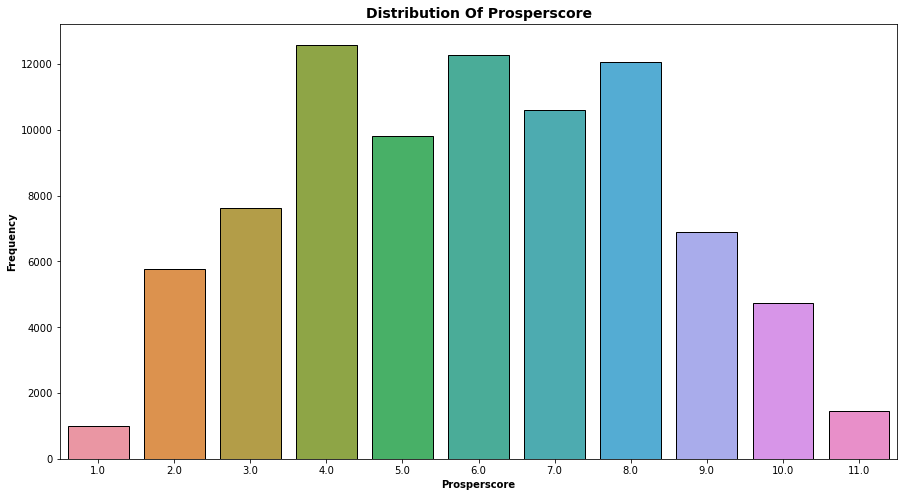

In [57]:
# define a function for counntplot

def CountPlot(df, xvar):
    
    # set plot dimensions
    plt.figure(figsize=[14,8])
    
    #plot
    sns.countplot(data = df, x = xvar, edgecolor = 'black')
    
    #Add title and format it
    plt.title(f'''Distribution of {xvar}'''.title(), fontsize = 14, weight = 'bold')
    
    #Add xlabel and format it
    plt.xlabel(xvar.title(), fontsize = 10, weight = 'bold')
    
    #Add ylabel and format it
    plt.ylabel('FREQUENCY'.title(), fontsize = 10, weight = 'bold')
    
  # plotting Prosper Score distribution  
CountPlot(loans,'ProsperScore')

The Prosper Score has a normal distribution with its peak at 4.0, 6.0 and 8.0 respectively

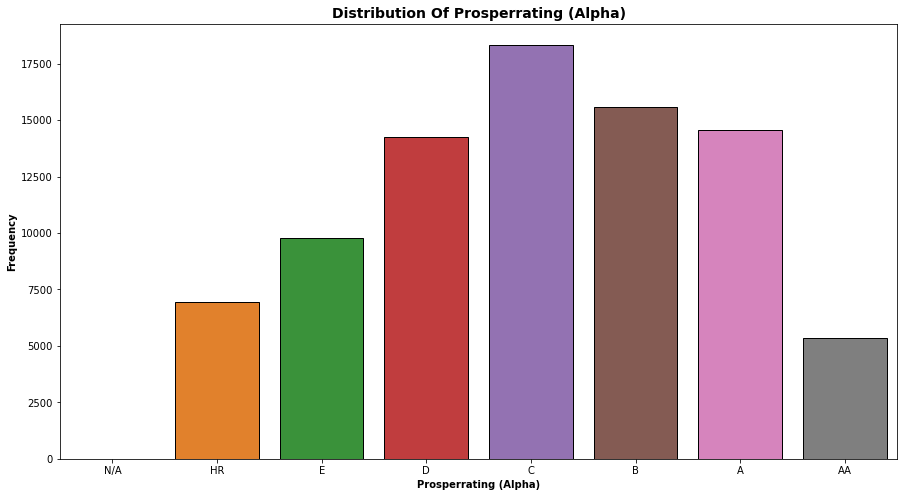

In [59]:
# plotting Prosper Rating Distribution

CountPlot(loans, 'ProsperRating (Alpha)')

The prosper rating is normally distributed and most loans has a prosper rating of C.

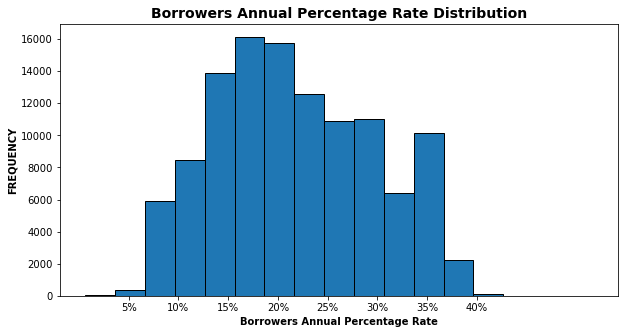

In [61]:
# Plotting the borrower's APR distribution

binsize = 3
bins = np.arange(loans['BorrowerAPR'].min()*100, loans['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist(x = loans['BorrowerAPR']*100, bins= bins)

#Set th edefault color and method to avoid the repetition of code
def x_y_t(xL,yL,title):
    plt.xlabel(xL, fontsize =10, weight = 'bold')
    plt.ylabel(yL, fontsize = 10, weight = 'bold')
    plt.title(title, fontsize = 14, weight = 'bold')
    
x_y_t('Borrowers Annual Percentage Rate','FREQUENCY','Borrowers Annual Percentage Rate Distribution')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5%','10%', '15%', '20%', '25%', '30%', '35%', '40%'])

plt.show()

The borrowers's annual peercentage rate is normally distributed with its peak at about 20% per annum. Also we note that there is a rapid increase in frequency before the 35% mark.


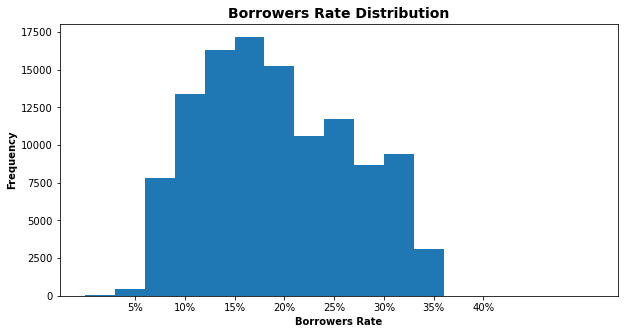

In [62]:
# Plotting the borrower's rate distribution

binsize = 3
bins = np.arange(loans['BorrowerRate'].min()*100, loans['BorrowerRate'].max()*100+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist(x = loans['BorrowerRate']*100, bins= bins)
x_y_t('Borrowers Rate','Frequency','Borrowers Rate Distribution')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5%','10%', '15%', '20%', '25%', '30%', '35%', '40%'])

plt.show()

The borrower rate is also normally distributed and the borrower rate for most of the loans is between 15% and 20%

In [26]:
loans.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

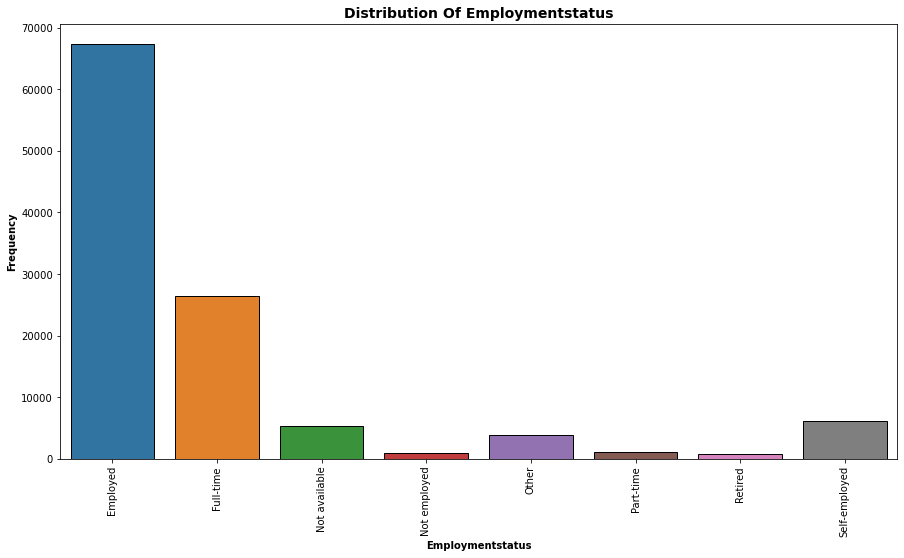

In [63]:
# plotting Employment Status Count

CountPlot(loans, 'EmploymentStatus')
plt.xticks(rotation=90)


The employment Status shows that those employed have access to more loans very close to about 70000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '$0'),
  Text(1, 0, '$1-24,999'),
  Text(2, 0, '$25,000-49,999'),
  Text(3, 0, '$50,000-74,999'),
  Text(4, 0, '$75,000-99,999'),
  Text(5, 0, '$100,000+')])

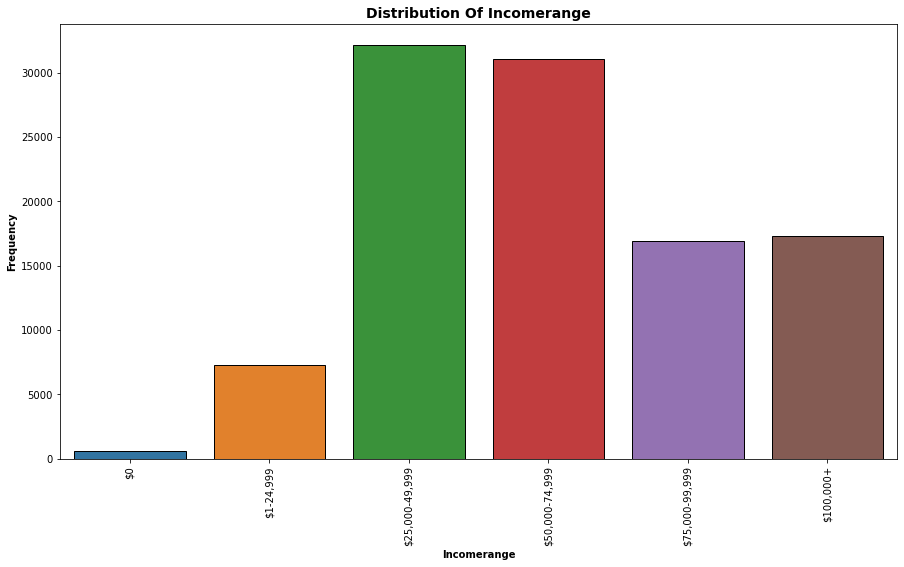

In [64]:
# plotting Income Range Count

CountPlot(loans,'IncomeRange')
plt.xticks(rotation=90)



The income range count shows that most loans are applied by people with income between 25000 to 49,999 and closely followed by those whose income range are between 50,000 to 74,999

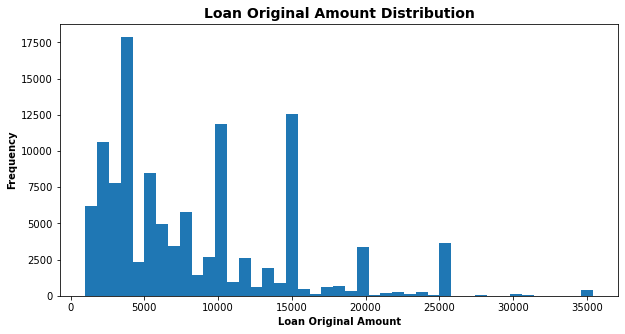

In [65]:
# Plotting loan original amount distribution

binsize = 800
bins = np.arange(loans['LoanOriginalAmount'].min(), loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist( x = loans['LoanOriginalAmount'], bins= bins)
x_y_t('Loan Original Amount','Frequency','Loan Original Amount Distribution')

plt.show()

The distributiion has a long tail to the right. For clarity, i will put it on a log scale.

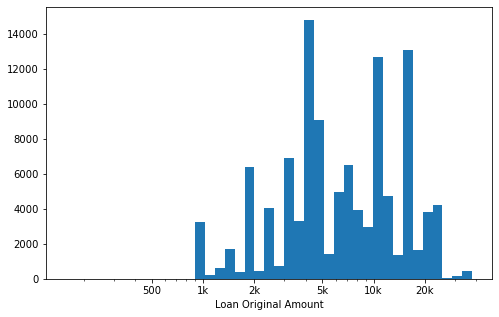

In [30]:
log_binsize = 0.058
bins = 10**np.arange(2.2, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Loan Original Amount')

plt.show()

The distribution shows that the original loan amount reaches at its peak at about 4000 and we notice a rapid decrease immediately after 5000

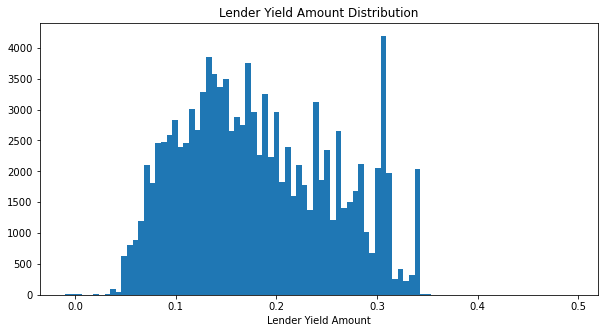

In [31]:
# Plotting Lender's yield distribution

binsize = 0.0056
bins = np.arange(loans['LenderYield'].min(), loans['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist( x = loans['LenderYield'], bins= bins)
plt.title('Lender Yield Amount Distribution')
plt.xlabel('Lender Yield Amount')


plt.show()

The distribution shows that the lender gain most when the interest is at 30%

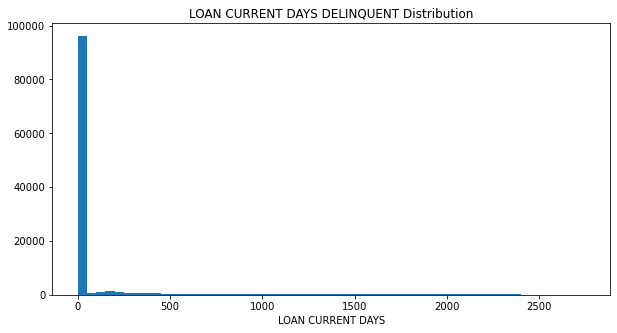

In [32]:
# Plotting Loan Current Days distribution

binsize = 50
bins = np.arange(loans['LoanCurrentDaysDelinquent'].min(), loans['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist( x = loans['LoanCurrentDaysDelinquent'], bins= bins)
plt.title('LOAN CURRENT DAYS DELINQUENT Distribution')
plt.xlabel('LOAN CURRENT DAYS')


plt.show()

I observe that the distribution is highly concentrated on the zero(0) mark. To get more clarity i will have another plot excluding the zero(0) mark.

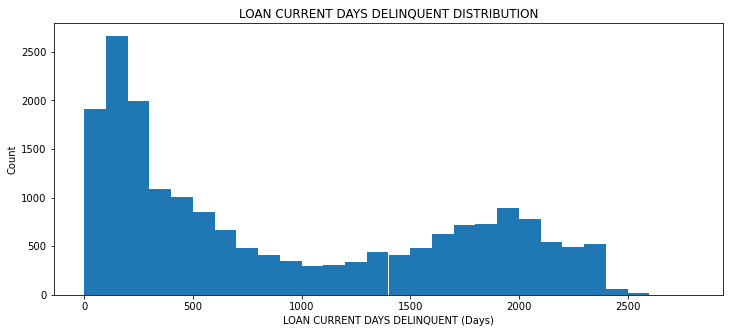

In [33]:
binsize = 100
bins = np.arange(0, loans['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = loans[loans['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.title('LOAN CURRENT DAYS DELINQUENT DISTRIBUTION')
plt.xlabel('LOAN CURRENT DAYS DELINQUENT (Days)')
plt.ylabel('Count')

plt.show()

From the above plot, most loans loans day delinquent excluding the zero(0) has its delinquent between the 0 and 500 days. 

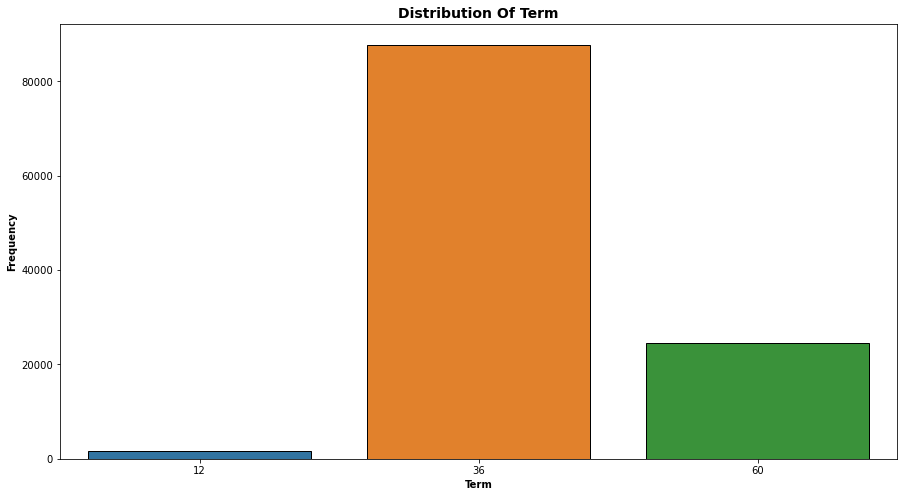

In [66]:
# plotting  Term Count

CountPlot(loans, 'Term')

The plot above shows that most loans has a duration of 36 months which is 2 years.

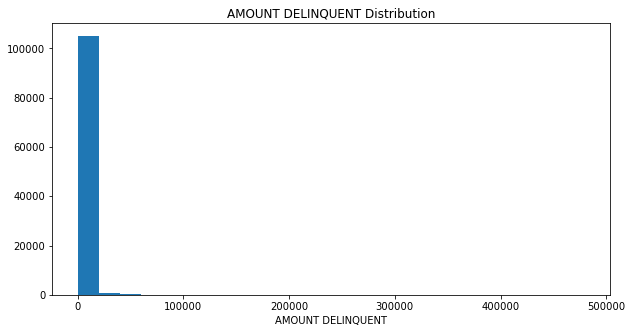

In [35]:
# Plotting Amount Delinquent distribution

binsize = 20000
bins = np.arange(loans['AmountDelinquent'].min(), loans['AmountDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist( x = loans['AmountDelinquent'], bins= bins)
plt.title('AMOUNT DELINQUENT Distribution')
plt.xlabel('AMOUNT DELINQUENT')


plt.show()

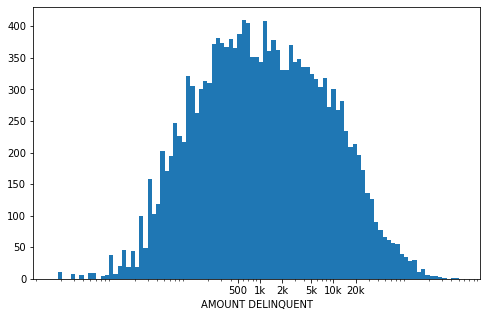

In [36]:
log_binsize = 0.058
bins = 10**np.arange(0.2, np.log10(loans['AmountDelinquent'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'AmountDelinquent', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('AMOUNT DELINQUENT')

plt.show()

The amount delinquent is normally distributed and roughly bi-modal one peak between 500 and 1000 and the other between 1000 and 2000

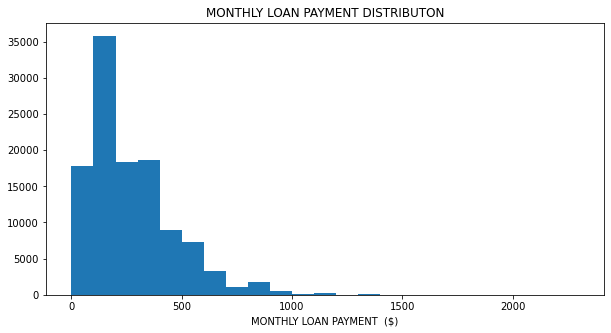

In [37]:
# Plotting the monthly loan payment  distribution

binsize = 100
bins = np.arange(loans['MonthlyLoanPayment'].min(), loans['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist(x = loans['MonthlyLoanPayment'], bins= bins)
plt.title('MONTHLY LOAN PAYMENT DISTRIBUTON')
plt.xlabel('MONTHLY LOAN PAYMENT  ($)')

plt.show()

The monthly payment is skewed to the right so i will use the log-scaled plott to get more insights.

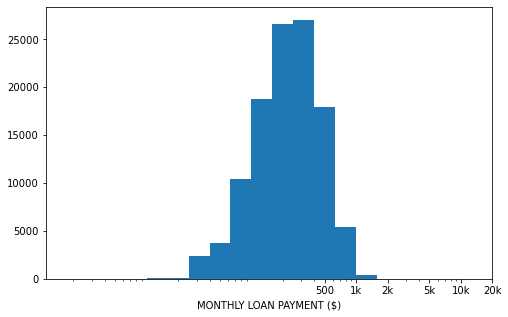

In [38]:
log_binsize = 0.2
bins = 10**np.arange(0.2, np.log10(loans['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('MONTHLY LOAN PAYMENT ($)')

plt.show()

The monthly loan payment is normally distributed and most loansn has a monthly monthly below 500$

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I examined some of my variables of interest like the monthly loan payment, amount delinquent, loan original amount using a log transform because they had a wide range of values. The amount delinquent feature became bimodal after the modification, with one peak between 500 and 1000 and another between 1000.and 2000

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When examining the loan current days delinquent, I disscovered that more than 80000 loans has due day at the zero(0) mark. I excluded those loans with 0 day delinquent to get the true amount of days delinquent allocated to the loans

## Bivariate Exploration

I want to start by examining the pairwise correlations between the features in my loans data. First i will separate my numeric features from my categorical features

In [39]:
num_var = ['Term','BorrowerAPR','BorrowerRate','LenderYield','AmountDelinquent','StatedMonthlyIncome','LoanCurrentDaysDelinquent','LoanOriginalAmount','MonthlyLoanPayment','LP_ServiceFees','Investors']
cat_var = ['LoanStatus','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IncomeRange']

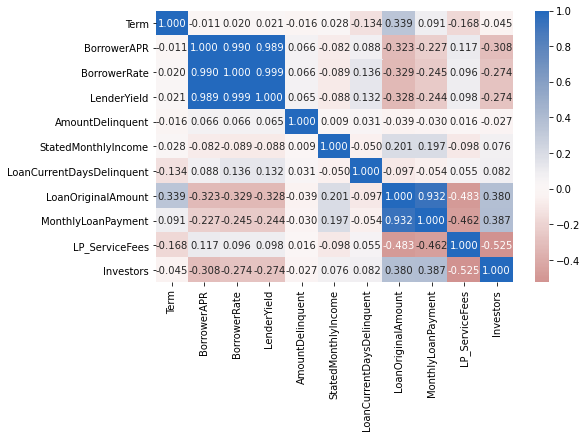

In [40]:
# correlation plot

plt.figure(figsize = [8, 5])
sns.heatmap(loans[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

loans.shape= (113937, 22)
loans_samp.shape= (500, 22)


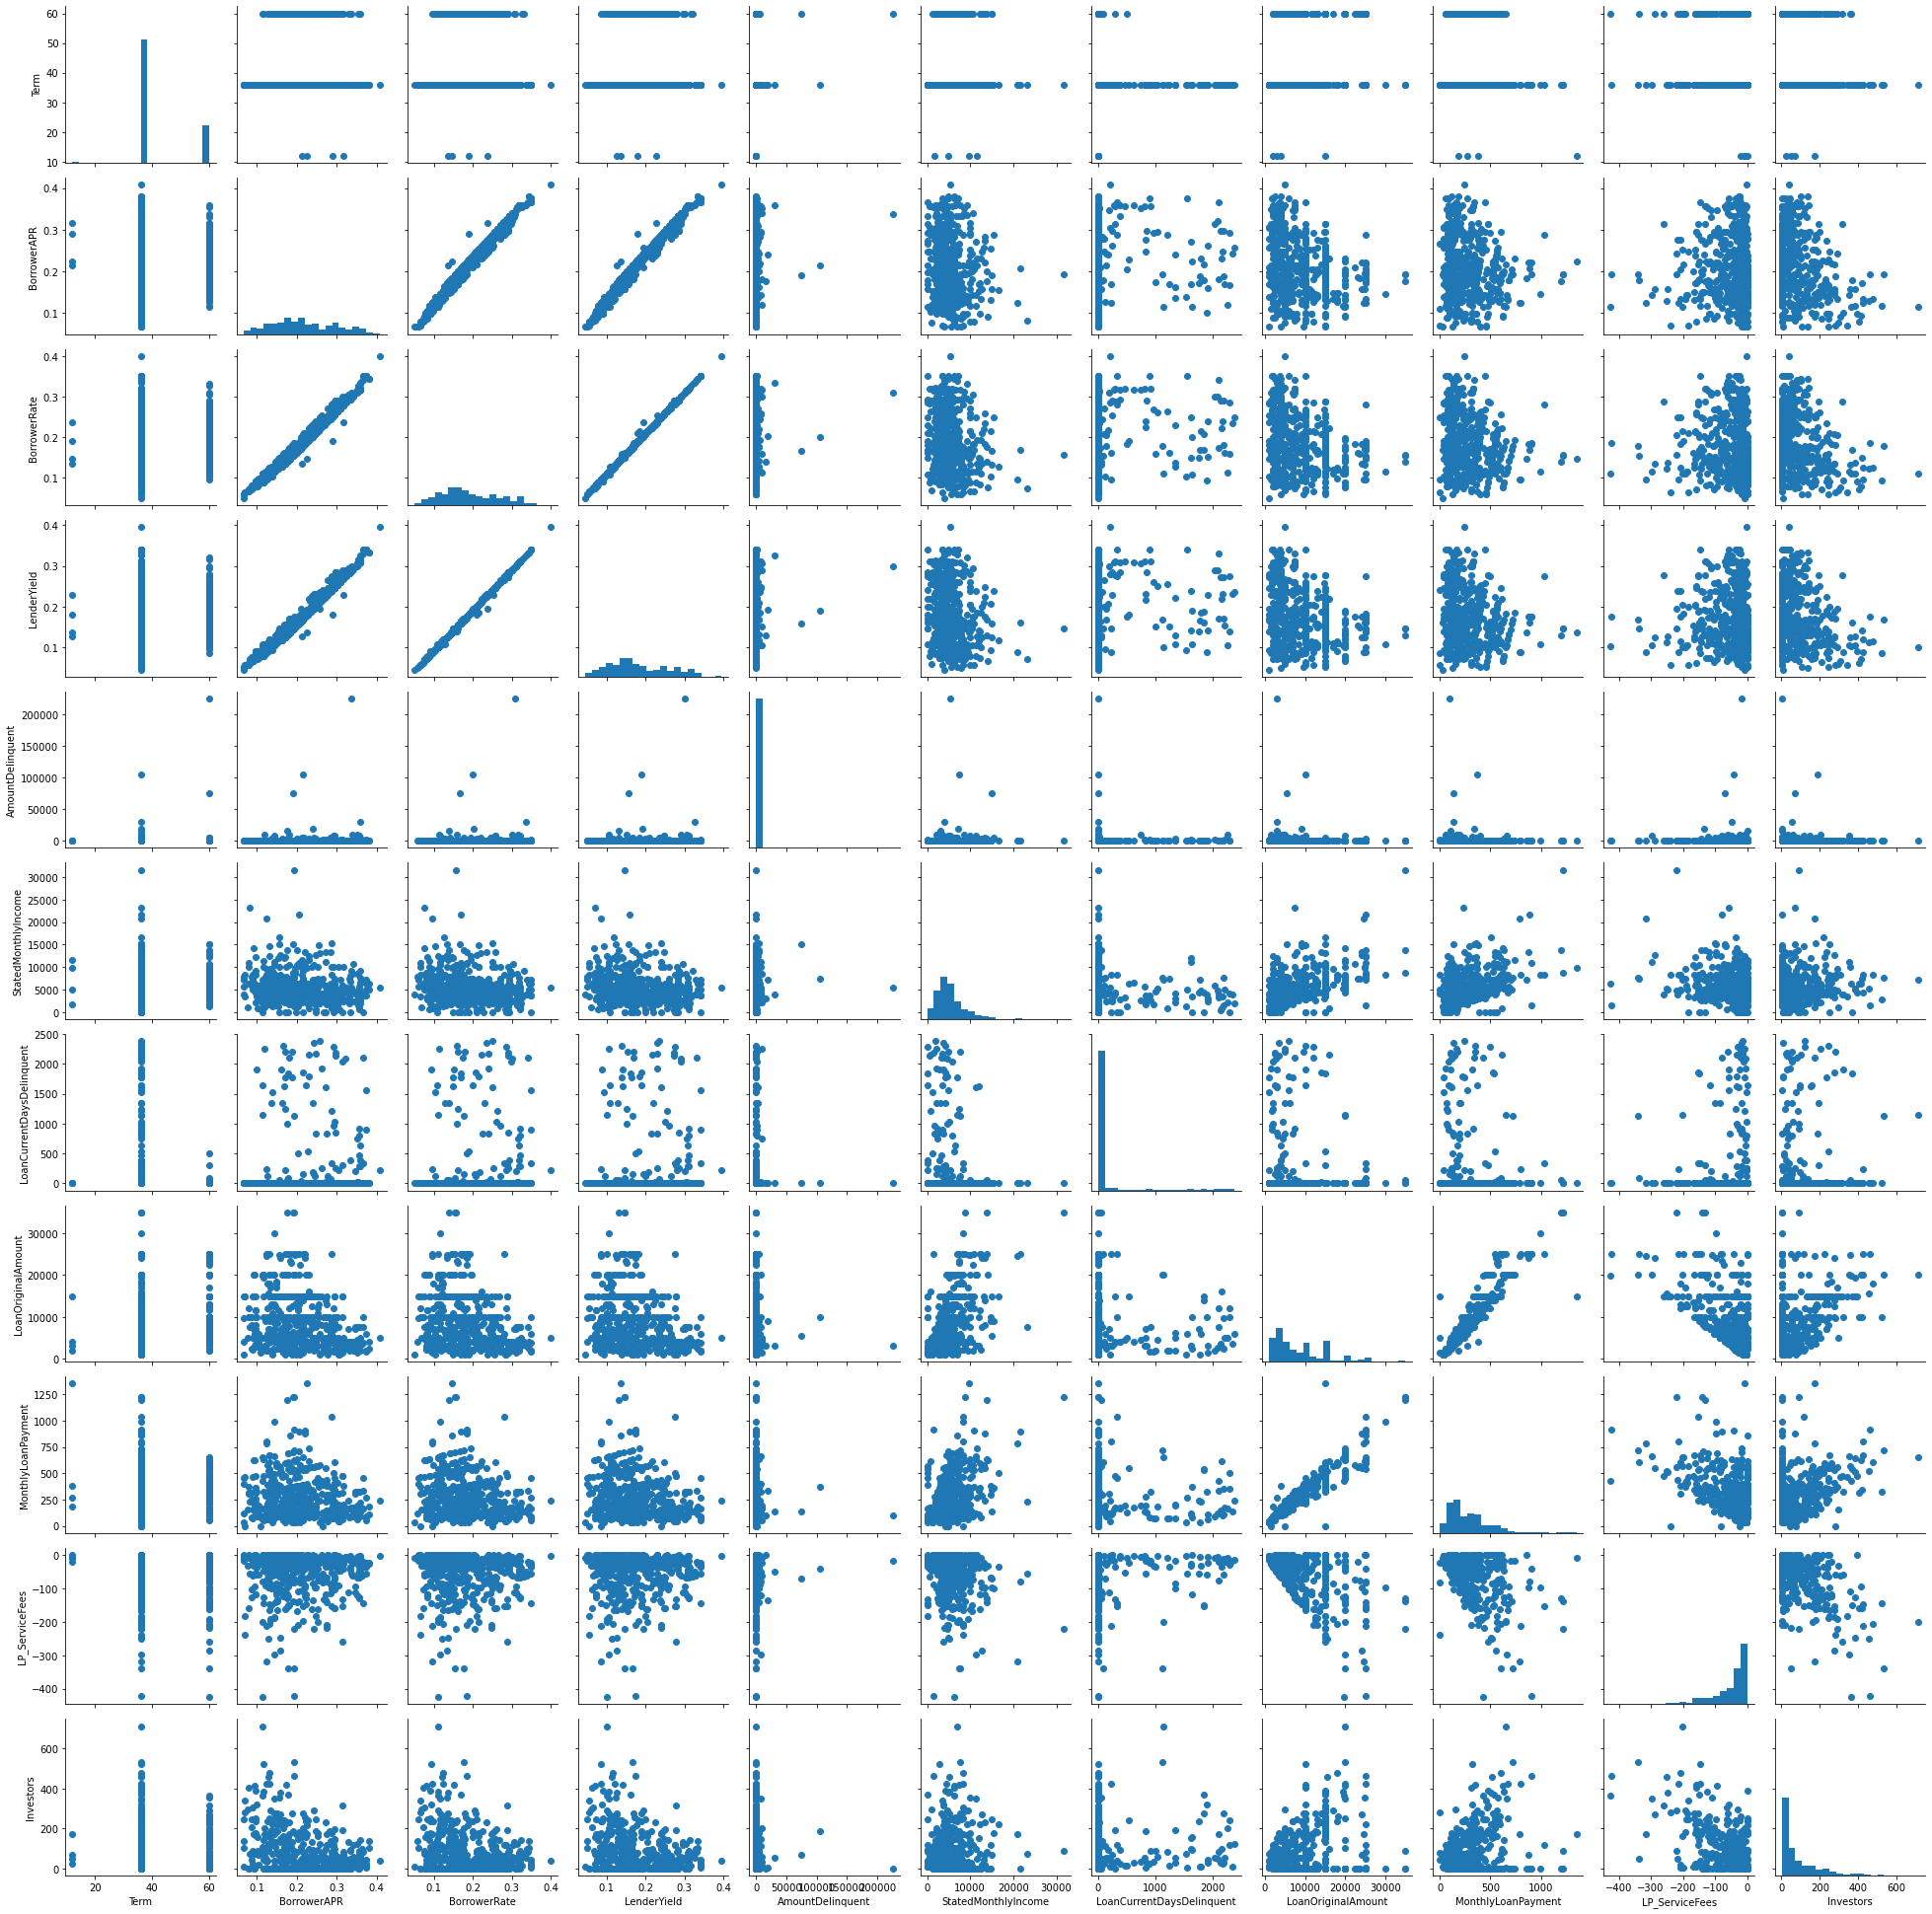

In [41]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("loans.shape=",loans.shape)
loans_samp = loans.sample(n=500, replace = False)
print("loans_samp.shape=",loans_samp.shape)

g = sns.PairGrid(data = loans_samp, vars = num_var)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

There are significant positive correletion between Borrower APR and Lender Yield. A positive correlation exists between Prosper Score and Prosper Rating. There is a small positive correlation between credit scores in the upper range and prosper scores.

Also, Borrower APR and lender yield have a negative correlation with Prosper score. Prosper ratings and APR have a correlation link, as do Prosper scores and Lender yield.

<Figure size 720x720 with 0 Axes>

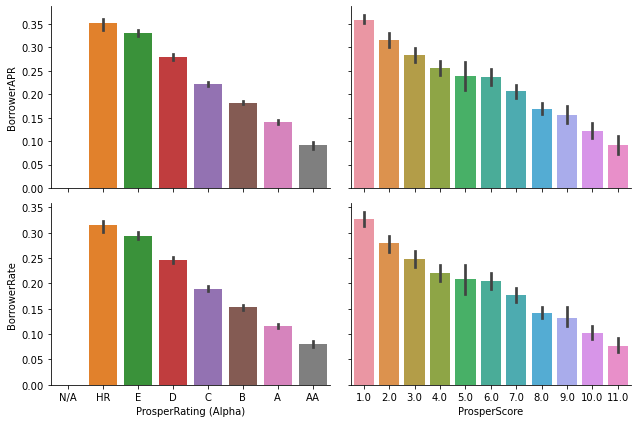

In [42]:
# checking the correlation between the borrower rate and APR against the prosper rating and score

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loans_samp, y_vars = ['BorrowerAPR','BorrowerRate'], x_vars = ['ProsperRating (Alpha)','ProsperScore'],
                height = 3, aspect = 1.5)
g.map(sns.barplot)
plt.show();

The Borrower APR and the Borrower rate has a negative correlation with the Prosper rating in the sense that as the Borrower rate or APR increase, the prosper rating .

<Figure size 1368x1080 with 0 Axes>

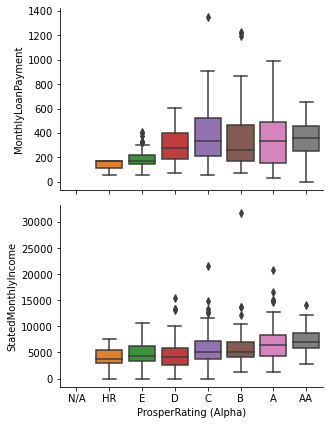

In [43]:
# checking the relationship between the monthly loan payment, stated monthly income against the prosper rating 

plt.figure(figsize = [19, 15])
g = sns.PairGrid(data = loans_samp, y_vars = ['MonthlyLoanPayment','StatedMonthlyIncome'], x_vars = ['ProsperRating (Alpha)'],
                height = 3, aspect = 1.5)
g.map(sns.boxplot)
plt.show();

The mean prosper rating increases as the monthly loan payment increases likewise the stated monthly income

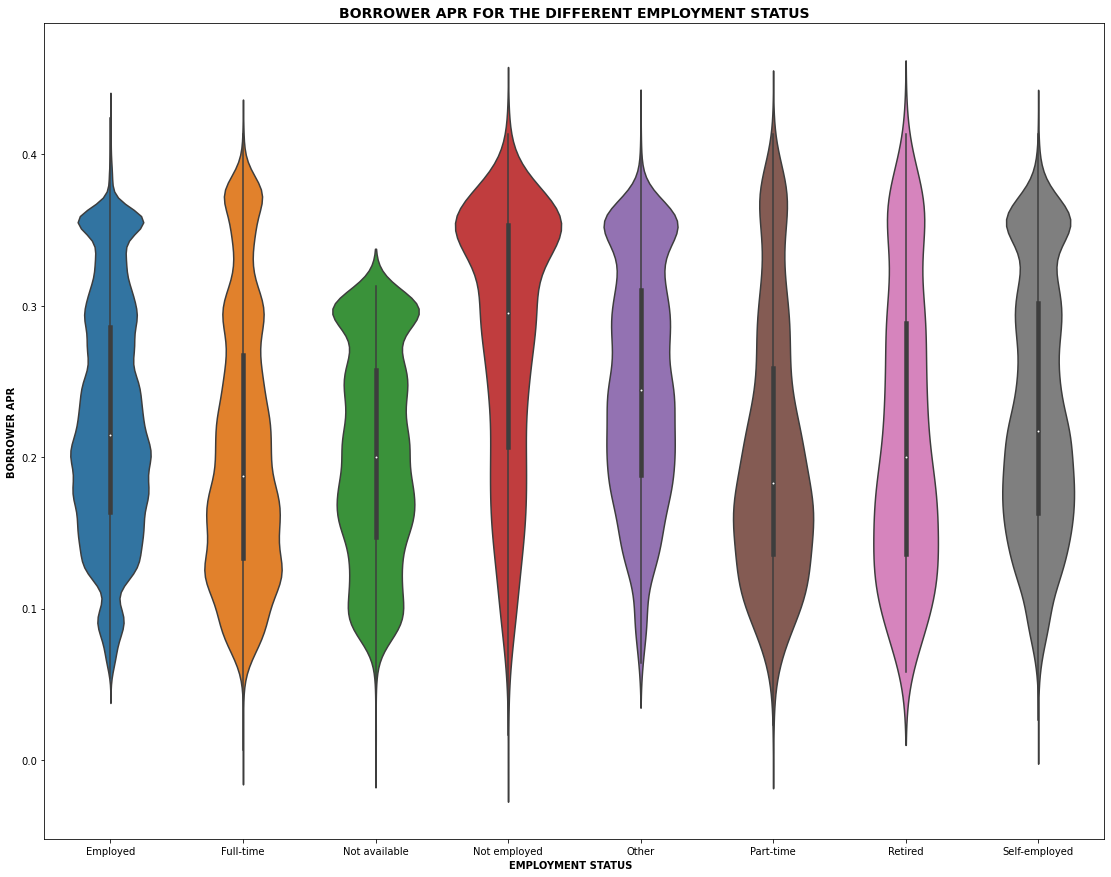

In [67]:
# checking the relationship between the employment status and the borrower APR

plt.figure(figsize = [19, 15])

sns.violinplot(data = loans,x='EmploymentStatus', y='BorrowerAPR');
x_y_t('EMPLOYMENT STATUS  ','BORROWER APR','BORROWER APR FOR THE DIFFERENT EMPLOYMENT STATUS');

From the above plot, i observe that the unemployed have higher borrower APR than the employed

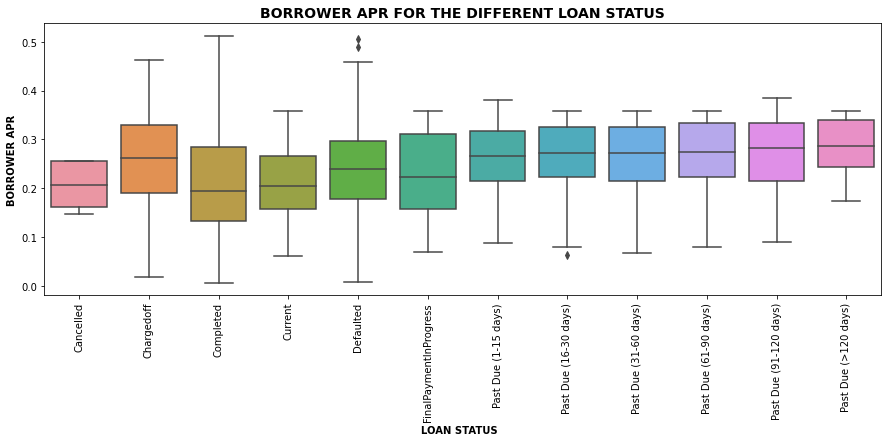

In [68]:
# checking the relationship between the loan status and the borrower APR

plt.figure(figsize = [15, 5])
sns.boxplot(data = loans,x='LoanStatus', y='BorrowerAPR');
x_y_t('LOAN STATUS  ','BORROWER APR','BORROWER APR FOR THE DIFFERENT LOAN STATUS')
plt.xticks(rotation=90);

Loans with past due date(days) draws higher borrower APR than others so borrowers are advised to complete their payment before the due day for the loan.

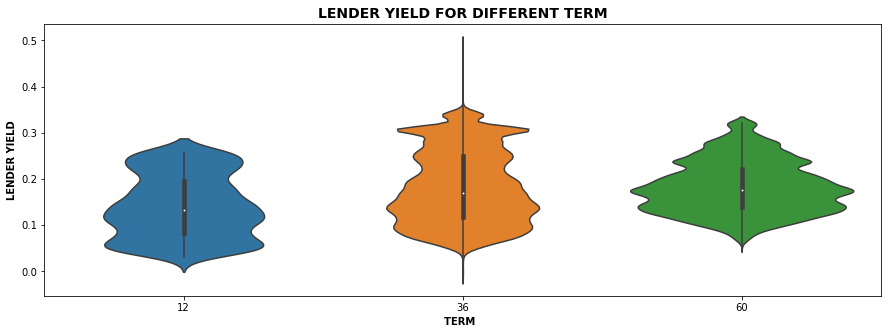

In [69]:
plt.figure(figsize = [15, 5])
sns.violinplot(data = loans,x='Term', y='LenderYield');
x_y_t('TERM  ','LENDER YIELD','LENDER YIELD FOR DIFFERENT TERM');

The lender yield increases as the term of the load increases. The lender tends to gain more when the loan term is at 60 months

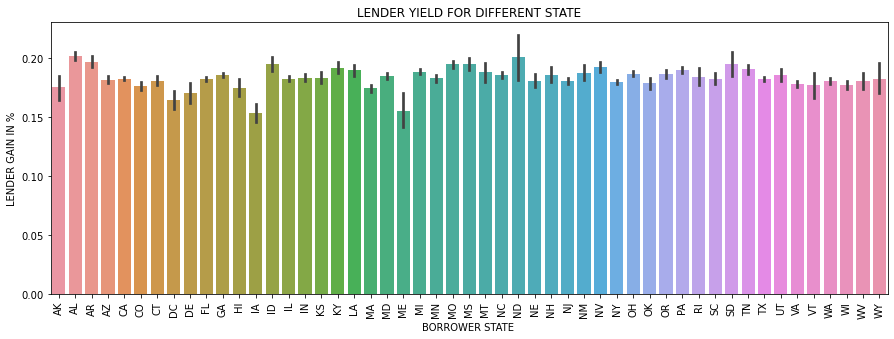

In [47]:
# checking the relationship between the lender yield and the borrstate APR

plt.figure(figsize = [15, 5])
sns.barplot(data = loans,x='BorrowerState', y='LenderYield');
plt.title('LENDER YIELD FOR DIFFERENT STATE')
plt.xlabel('BORROWER STATE ');
plt.ylabel('LENDER GAIN IN %');
plt.xticks(rotation=90);

The north dakota has the highest lender yield or gain than any other state.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are significant positive correletion between Borrower APR and Lender Yield. A positive correlation exists between Prosper Score and Prosper Rating. There is a small positive correlation between credit scores in the upper range and prosper scores. 

Also, Borrower APR and lender yield have a negative correlation with Prosper score. Prosper ratings and APR have a correlation link, as do Prosper scores and Lender yield.

The Borrower APR and the Borrower rate has a negative correlation with the Prosper rating in the sense that as the Borrower rate or APR increase, the prosper rating decreases

In addition, there was also an interesting relationship observed between borrower APR and the categorical features. I observe that  Loans with past due date(days) draws higher borrower APR than others so borrowers are advised to complete their payment before the due day for the loan. Also, the unemployed have higher borrower APR than the employed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The lender's percentage yield has an interesting correlation with borrower state and the length of the loan(term)


## Multivariate Exploration



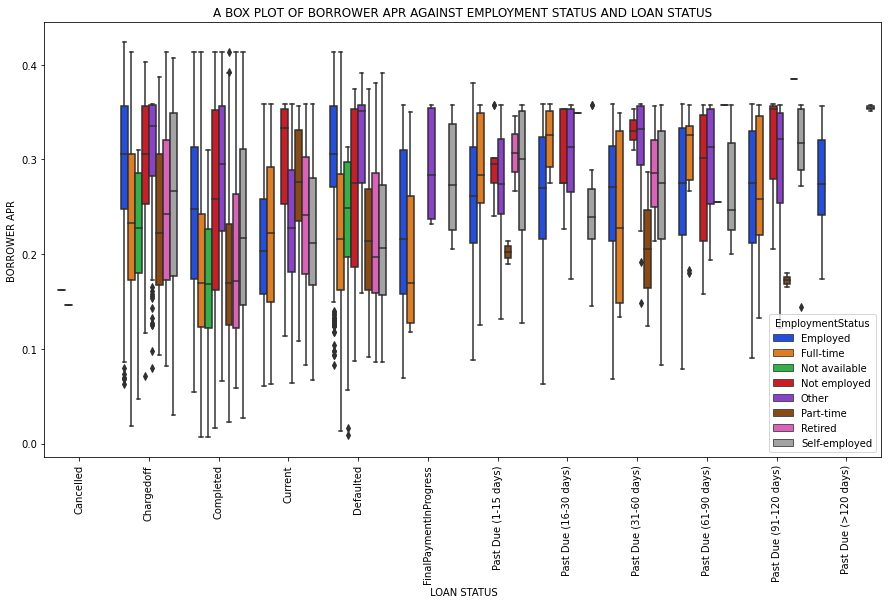

In [48]:
plt.figure(figsize=[15,8])
sns.boxplot(
    x='LoanStatus', 
    y='BorrowerAPR', 
    data=loans, 
    palette='bright',
    hue='EmploymentStatus')
plt.ylabel('BORROWER APR')
plt.xlabel(' LOAN STATUS')
plt.title('A BOX PLOT OF BORROWER APR AGAINST EMPLOYMENT STATUS AND LOAN STATUS')
plt.xticks(rotation=90);

From the abov eplots, i discover that loans with past due dates attracts higher borrower APR especially for the unemployed

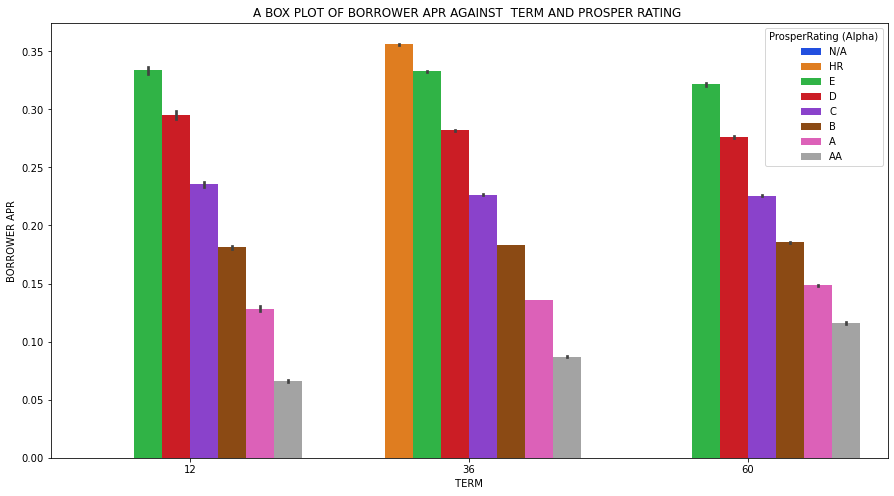

In [49]:
plt.figure(figsize=[15,8])
sns.barplot(
    x='Term', 
    y='BorrowerAPR', 
    data=loans, 
    palette='bright',
    hue='ProsperRating (Alpha)')
plt.ylabel('BORROWER APR')
plt.xlabel(' TERM ')
plt.title('A BOX PLOT OF BORROWER APR AGAINST  TERM AND PROSPER RATING ');

The above plot shows that loans of 60 months have better or higher prosper rating sthan those of shorter terms.

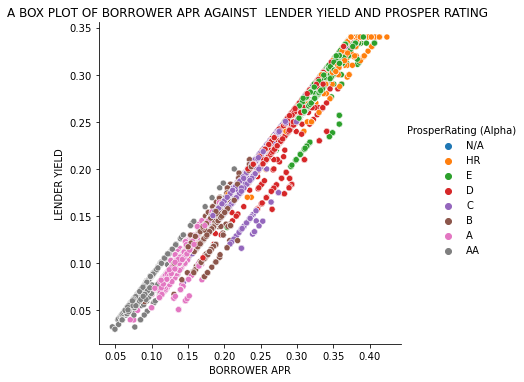

In [50]:
sns.relplot(x="BorrowerAPR", y="LenderYield", hue="ProsperRating (Alpha)", data=loans)
plt.xlabel('BORROWER APR')
plt.ylabel(' LENDER YIELD ')
plt.title('A BOX PLOT OF BORROWER APR AGAINST  LENDER YIELD AND PROSPER RATING ');

I observe that an increase in the borrower APR also leads to an increase to the lender yield which also has an inverse relationship with the prosper rarting.

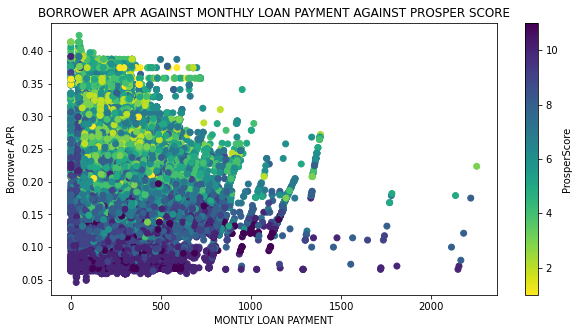

In [51]:
plt.figure(figsize = [10, 5])
plt.scatter(data=loans,x='MonthlyLoanPayment',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('BORROWER APR AGAINST MONTHLY LOAN PAYMENT AGAINST PROSPER SCORE');
plt.xlabel('MONTLY LOAN PAYMENT');
plt.ylabel('Borrower APR');

I observe that the borrower APR is negatively correlated to the the prosper score irrespective of the  monthly loan payment

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I observe that the prosper rating or the prosper score and the borrower APR has a strong negative correlation. Also, for the employment status, the unemployed have a higher borrower APR than the employed.

### Were there any interesting or surprising interactions between features?

I discovered that the lender yield has a strong positive correlation with the borrower APR.